In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [11]:
#Loading the data set
df = pd.read_csv("C:/Users/KIIT0001/Python Programs/OECD Alcohol Consumption per Capita.csv");

In [12]:
#Exploring the distribution of alcohol consumption across countries in years
df.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN


In [13]:
df.shape

(2751, 9)

In [14]:
df.describe()

,index,TIME,LITRES/CAPITA
count,2751.00000,2751.000000,2751.000000
mean,1375.00000,1991.840058,8.946892
std,794.28962,17.196571,4.248435
min,0.00000,1960.000000,0.000000
25%,687.50000,1977.000000,6.100000
50%,1375.00000,1993.000000,9.200000
75%,2062.50000,2007.000000,11.600000
max,2750.00000,2022.000000,23.600000


# Preprocessing of Data

In [15]:
# Cheaking the informational stats
Informational_stat=df.info()
print(Informational_stat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2751 non-null   int64  
 1   LOCATION       2751 non-null   object 
 2   INDICATOR      2751 non-null   object 
 3   SUBJECT        2751 non-null   object 
 4   MEASURE        2751 non-null   object 
 5   FREQUENCY      2751 non-null   object 
 6   TIME           2751 non-null   int64  
 7   LITRES/CAPITA  2751 non-null   float64
 8   Flag Codes     216 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 193.6+ KB
None


In [16]:
# cheaking for the total null values
null_values_total = df.isnull().sum()
print("Total null values in the dataset:\n", null_values_total)

Total null values in the dataset:
 index               0
LOCATION            0
INDICATOR           0
SUBJECT             0
MEASURE             0
FREQUENCY           0
TIME                0
LITRES/CAPITA       0
Flag Codes       2535
dtype: int64


<Axes: >

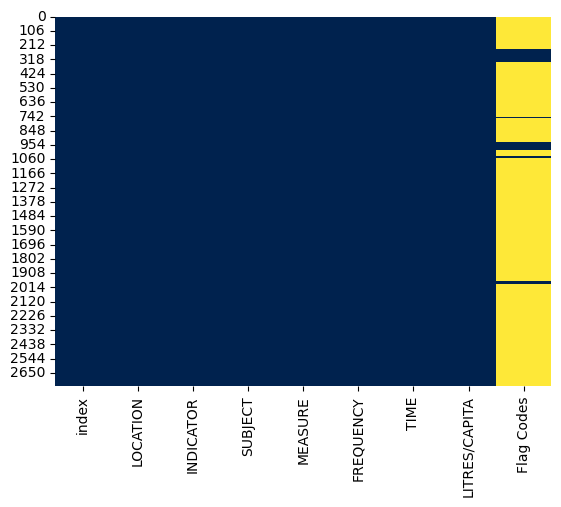

In [17]:
# Showing the null values by the heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')

# EDA

In [18]:
# Showing the grouped bar chart by plotly express
fig = px.bar(df, x='TIME', y='LOCATION', color='LITRES/CAPITA', 
              title='Alcohol Consumption per Capita Over Time for Different Countries',
              labels={'LITRES/CAPITA': 'Alcohol Consumption (Liters per Capita)'})

fig.update_layout(xaxis=dict(range=[1960, 2030]))
fig.show()

In [19]:
# Showing the scattered graph of consumption over time
fig = px.scatter(df, x='TIME', y='LITRES/CAPITA', color='LOCATION', 
              title='Alcohol Consumption per Capita Over Time for Different Countries',
              labels={'LITRES/CAPITA': 'Alcohol Consumption (Liters per Capita)'})

fig.show()

In [20]:
# Using pivot table to describe the consumption over time
pivot_df = df.pivot_table(values='LITRES/CAPITA', index='LOCATION', columns='TIME')

fig = px.imshow(pivot_df, labels={'color': 'LITRES/CAPITA'}, 
                x=pivot_df.columns, y=pivot_df.index,
                title='Heatmap of Alcohol Consumption per Capita Over Time for Different Countries')

fig.show()

In [21]:
# Using pivot table to describe the consumption over time
fig = px.line(df, x='TIME', y='LITRES/CAPITA', color='LOCATION', markers=True,
              title='Alcohol Consumption per Capita Over Time for Different Countries',
              labels={'LITRES/CAPITA': 'Alcohol Consumption (Liters per Capita)'})

#show the graph
fig.show()

In [22]:
# Using choropleth by plotly to show the consumption on a geographical map
import plotly.graph_objects as go
fig = px.choropleth(df[['LOCATION','LITRES/CAPITA']].groupby('LOCATION').mean().reset_index(), locations='LOCATION',
                           color_continuous_scale="Blues",
                            color='LITRES/CAPITA',
                            range_color=(0, 18),
                            title='OECD Alcohol Consumption per Capita Mean'
                          )
fig.show()

# Linear Regression

In [23]:
df

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN
...,...,...,...,...,...,...,...,...,...
2746,2746,ROU,ALCOHOL,TOT,LT_CAP15,A,2015,9.5,NaN
2747,2747,ROU,ALCOHOL,TOT,LT_CAP15,A,2016,9.6,NaN
2748,2748,ROU,ALCOHOL,TOT,LT_CAP15,A,2017,10.1,NaN
2749,2749,ROU,ALCOHOL,TOT,LT_CAP15,A,2018,11.0,NaN


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
## Indepemdent and Dependent features
features = df[['TIME']]
target = df['LITRES/CAPITA']

In [26]:
## Spliting the data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(features,
                    target, test_size=0.2, random_state=48)

In [27]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
## Prediction of test data
y_pred=regression.predict(X_test)

In [29]:
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 18.993039536844506


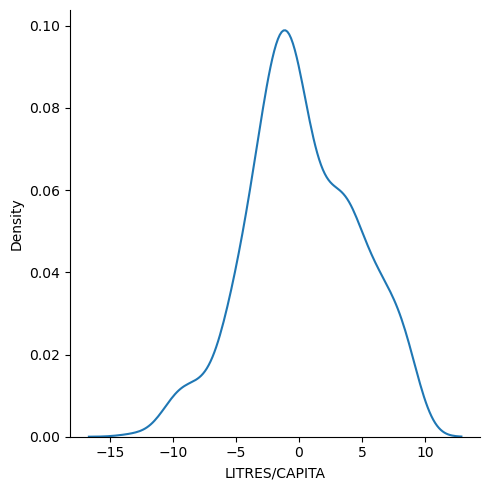

In [30]:
sns.displot(y_pred-y_test, kind='kde')

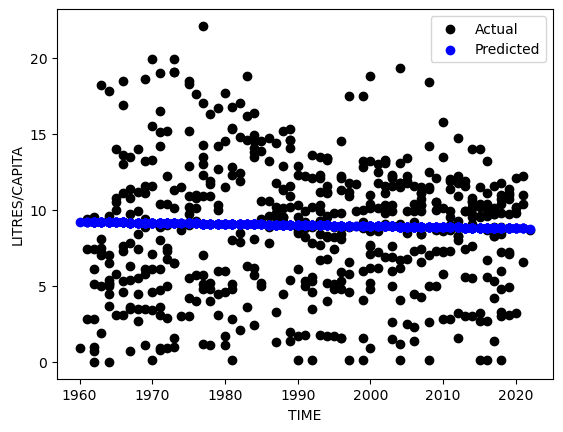

In [31]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('TIME')
plt.ylabel('LITRES/CAPITA')
plt.legend()
plt.show()

# KNN Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
features = df[['TIME']]
target = df['LITRES/CAPITA']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=48)

In [35]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
y_pred = knn_regressor.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error (MSE):',mse)

Mean Squared Error (MSE): 21.333132486388386


In [38]:
fig = px.box(x=X_test['TIME'], y=y_test, labels={'y': 'Actual'},
                 title='Actual vs. Predicted Alcohol Consumption per Capita (KNN Regression)')
fig.add_scatter(x=X_test['TIME'], y=y_pred, mode='markers', name='Predicted')
fig.show()